# Applied Data Science Lab 2 : Sentiment Analysis

# Task 1

We are provided with large data set for Ford motor vehecles which is available moodle. Each review is labelled 'Pos or 'Neg' to indicate whether review has benn assessed as positive or negative. There are 1,382 reviews in CSV file (car_reviews.csv) , 691 of which are positive and 691 of which are negative


Task 1 can be established utilising the following three steps:

1. Preprocessing data
2. Naive Bayes (Machine learing part)
3. Summary performance (assess accuray and confusion metric)

In [1]:
import csv
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

##  1. Preprocessing data

-- There are two columns in the data: sentiment (label) and reviews (feature). I created the adjust sentence function to prepare the data for further analysis. It consists of four phases to alter the sentence as shown below (or see def adust sentence for more information).

5 Steps (3 adjustments)
1. Eliminate the punctuation and number
2. Change all alphabhets to lowercase and split the sentence to list of words contain in it
3. Eliminate Stopwords in sentecnce
4. Tokennize the words. Considering only word has more than 3 letters
5. Stem the word

In the next box, I would explain and describe in detail how each process works.

## Function for Preprocessing Data

In [2]:
def adjust_sentence(sentence):    
    data=sentence.translate(sentence.maketrans(replace_dict)).lower().split() #First adjusment (Step 1&2)
    data=[x for x in data if x not in StopWords and len(x)>=3] #Second adjustment (Step 3&4)
    data=[ps.stem(y) for y in data] # Thrid adjustment Step(5)
    return data



### --Preprocessing Data (Step 1&2) :Remove punctuation and number, Tranfers to lowercase and Split to list

I made the dictionary of punctuation and number for replace it by ' '. In the first line of code in function adjust_sentence, (https://docs.python.org/3/library/string.html#string.digits). i apply [`translate()`] with maketrans() to replace punction , then change to lowercase and split to list respectively

In [3]:
###### Example for step 1

with open('car_reviews.csv') as f:
        
        reader = csv.reader(f)
        next(reader)
        data = []
        for row in reader:
            
            data.append(row)   
            
example = data.copy()

In [4]:
punc=string.punctuation
digit=string.digits
punc_dict=punc+digit
replace_dict={}
for i in punc_dict:
    replace_dict[i]=' '


### Example : First adjustment (step 1&2)

In [5]:
first_review= example[0][1]
print('First review')
print(first_review)

First review
 In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I don t think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 


In [6]:
first_review_adjust1=first_review.translate(first_review.maketrans(replace_dict)).lower().split()
print('After apply step 1 &2 on first review')
print(first_review_adjust1)

After apply step 1 &2 on first review
['in', 'we', 'bought', 'a', 'new', 'taurus', 'and', 'we', 'really', 'loved', 'it', 'so', 'in', 'we', 'decided', 'to', 'try', 'a', 'new', 'taurus', 'i', 'did', 'not', 'care', 'for', 'the', 'style', 'of', 'the', 'newer', 'version', 'but', 'bought', 'it', 'anyway', 'i', 'do', 'not', 'like', 'the', 'new', 'car', 'half', 'as', 'much', 'as', 'i', 'liked', 'our', 'other', 'one', 'thee', 'dash', 'is', 'much', 'to', 'deep', 'and', 'takes', 'up', 'a', 'lot', 'of', 'room', 'i', 'do', 'not', 'find', 'the', 'seats', 'as', 'comfortable', 'and', 'the', 'way', 'the', 'sides', 'stick', 'out', 'further', 'than', 'the', 'strip', 'that', 'should', 'protect', 'your', 'card', 'from', 'denting', 'it', 'drives', 'nice', 'and', 'has', 'good', 'pick', 'up', 'but', 'you', 'can', 'not', 'see', 'the', 'hood', 'at', 'all', 'from', 'the', 'driver', 'seat', 'and', 'judging', 'and', 'parking', 'is', 'difficult', 'it', 'has', 'a', 'very', 'small', 'gas', 'tank', 'i', 'would', 'not'

### --Preprocessing data (Step 3&4) : Eliminate Stop words and Tokenise

A term in a stop word that is filtered out the word in the processing phase is referred to as a stop word (text)  

I combine the two steps of eliminating the stop word and tokenizing in the second line of the adjust sentence function. I use the same criteria with my search engine (Software lab4), which eliminates any words with a score of less than 3. As a result, my second code line will continue to maintain words that aren't listed as Stop words but have more than three letters.

In [7]:
StopWords = set(stopwords.words('english'))
first_review_adjust2=[x for x in first_review_adjust1 if x not in StopWords and len(x)>=3]

In [8]:
print('After apply step 3 &4 on first review')
print(first_review_adjust2)

After apply step 3 &4 on first review
['bought', 'new', 'taurus', 'really', 'loved', 'decided', 'try', 'new', 'taurus', 'care', 'style', 'newer', 'version', 'bought', 'anyway', 'like', 'new', 'car', 'half', 'much', 'liked', 'one', 'thee', 'dash', 'much', 'deep', 'takes', 'lot', 'room', 'find', 'seats', 'comfortable', 'way', 'sides', 'stick', 'strip', 'protect', 'card', 'denting', 'drives', 'nice', 'good', 'pick', 'see', 'hood', 'driver', 'seat', 'judging', 'parking', 'difficult', 'small', 'gas', 'tank', 'would', 'buy', 'taurus', 'would', 'rather', 'back', 'think', 'style', 'nice', 'mistake', 'change', 'style', 'less', 'month', 'dead', 'battery', 'flat', 'tire']


#### Comparison : First adjustment (step1&2) and Second adjustment (add on step3&4)

After apply step 1 &2 on first review
['in', 'we', 'bought', 'a', 'new', 'taurus', 'and', 'we', 'really', 'loved', 'it', 'so', 'in', 'we', 'decided', 'to', 'try', 'a', 'new', 'taurus', 'i', 'did', 'not', 'care', 'for', 'the', 'style', 'of', 'the', 'newer', 'version', 'but', 'bought', 'it', 'anyway', 'i', 'do', 'not', 'like', 'the', 'new', 'car', 'half', 'as', 'much', 'as', 'i', 'liked', 'our', 'other', 'one', 'thee', 'dash', 'is', 'much', 'to', 'deep', 'and', 'takes', 'up', 'a', 'lot', 'of', 'room', 'i', 'do', 'not', 'find', 'the', 'seats', 'as', 'comfortable', 'and', 'the', 'way', 'the', 'sides', 'stick', 'out', 'further', 'than', 'the', 'strip', 'that', 'should', 'protect', 'your', 'card', 'from', 'denting', 'it', 'drives', 'nice', 'and', 'has', 'good', 'pick', 'up', 'but', 'you', 'can', 'not', 'see', 'the', 'hood', 'at', 'all', 'from', 'the', 'driver', 'seat', 'and', 'judging', 'and', 'parking', 'is', 'difficult', 'it', 'has', 'a', 'very', 'small', 'gas', 'tank', 'i', 'would', 'not', 'buy', 'a', 'taurus', 'if', 'i', 'had', 'it', 'to', 'do', 'over', 'i', 'would', 'rather', 'have', 'my', 'back', 'i', 'don', 't', 'think', 'the', 'style', 'is', 'as', 'nice', 'as', 'the', 'the', 'and', 'it', 'was', 'a', 'mistake', 'to', 'change', 'the', 'style', 'in', 'less', 'than', 'a', 'month', 'we', 'had', 'a', 'dead', 'battery', 'and', 'a', 'flat', 'tire']

After apply step 3 &4 on first review
['bought', 'new', 'taurus', 'really', 'loved', 'decided', 'try', 'new', 'taurus', 'care', 'style', 'newer', 'version', 'bought', 'anyway', 'like', 'new', 'car', 'half', 'much', 'liked', 'one', 'thee', 'dash', 'much', 'deep', 'takes', 'lot', 'room', 'find', 'seats', 'comfortable', 'way', 'sides', 'stick', 'strip', 'protect', 'card', 'denting', 'drives', 'nice', 'good', 'pick', 'see', 'hood', 'driver', 'seat', 'judging', 'parking', 'difficult', 'small', 'gas', 'tank', 'would', 'buy', 'taurus', 'would', 'rather', 'back', 'think', 'style', 'nice', 'mistake', 'change', 'style', 'less', 'month', 'dead', 'battery', 'flat', 'tire']



### -- Preprocessing Data (Step5) : Stemming

Word Stem is a method that treats different words that are slightly different as the same thing. Because one word (with the same meaning) can be written in a variety of ways, such as 'play,' 'plays,' 'playing,' and so on. As a result of sentiment analysis being difficult and ineffective, stemming words is a key task for data preparation.

In [9]:
ps=PorterStemmer()


In [10]:
first_review_adjust3=[ps.stem(y) for y in first_review_adjust2]

print('After apply step 5 on first review')
print(first_review_adjust3)

After apply step 5 on first review
['bought', 'new', 'tauru', 'realli', 'love', 'decid', 'tri', 'new', 'tauru', 'care', 'style', 'newer', 'version', 'bought', 'anyway', 'like', 'new', 'car', 'half', 'much', 'like', 'one', 'thee', 'dash', 'much', 'deep', 'take', 'lot', 'room', 'find', 'seat', 'comfort', 'way', 'side', 'stick', 'strip', 'protect', 'card', 'dent', 'drive', 'nice', 'good', 'pick', 'see', 'hood', 'driver', 'seat', 'judg', 'park', 'difficult', 'small', 'ga', 'tank', 'would', 'buy', 'tauru', 'would', 'rather', 'back', 'think', 'style', 'nice', 'mistak', 'chang', 'style', 'less', 'month', 'dead', 'batteri', 'flat', 'tire']


#### Comparison : Second adjustment  and Thrid adjustment (add on step5)

After apply step 3 &4 on first review ['bought', 'new', 'taurus', 'really', 'loved', 'decided', 'try', 'new', 'taurus', 'care', 'style', 'newer', 'version', 'bought', 'anyway', 'like', 'new', 'car', 'half', 'much', 'liked', 'one', 'thee', 'dash', 'much', 'deep', 'takes', 'lot', 'room', 'find', 'seats', 'comfortable', 'way', 'sides', 'stick', 'strip', 'protect', 'card', 'denting', 'drives', 'nice', 'good', 'pick', 'see', 'hood', 'driver', 'seat', 'judging', 'parking', 'difficult', 'small', 'gas', 'tank', 'would', 'buy', 'taurus', 'would', 'rather', 'back', 'think', 'style', 'nice', 'mistake', 'change', 'style', 'less', 'month', 'dead', 'battery', 'flat', 'tire']

After apply step 5 on first review
['bought', 'new', 'tauru', 'realli', 'love', 'decid', 'tri', 'new', 'tauru', 'care', 'style', 'newer', 'version', 'bought', 'anyway', 'like', 'new', 'car', 'half', 'much', 'like', 'one', 'thee', 'dash', 'much', 'deep', 'take', 'lot', 'room', 'find', 'seat', 'comfort', 'way', 'side', 'stick', 'strip', 'protect', 'card', 'dent', 'drive', 'nice', 'good', 'pick', 'see', 'hood', 'driver', 'seat', 'judg', 'park', 'difficult', 'small', 'ga', 'tank', 'would', 'buy', 'tauru', 'would', 'rather', 'back', 'think', 'style', 'nice', 'mistak', 'chang', 'style', 'less', 'month', 'dead', 'batteri', 'flat', 'tire']

#### Stem Example

To be more clear with Stem, I would give 3 more exmaples as below

In [11]:
print('STEMMING EXAMPLE 1')
print(" ")
print(' BEFORE         AFTER')
print("computer     -->  ", ps.stem('computer'))
print("computers    -->  ", ps.stem('computers'))
print("compute    -->  ", ps.stem('compute'))
print("computering   -->  ", ps.stem('computering'))
print("")
print('STEMMING EXAMPLE 2')
print(" ")
print('BEFORE           AFTER')
print("decide    --> ", ps.stem('decide'))
print("decides   --> ", ps.stem('decides'))
print("decided  --> ", ps.stem('decided'))
print("deciding --> ", ps.stem('deciding'))
print("")
print('STEMMING EXAMPLE 3')
print(" ")
print('BEFORE       AFTER')
print("sleeps    --> ", ps.stem('sleeps'))
print("sleep   --> ", ps.stem('sleep'))
print("sleeping --> ", ps.stem('sleeping'))


STEMMING EXAMPLE 1
 
 BEFORE         AFTER
computer     -->   comput
computers    -->   comput
compute    -->   comput
computering   -->   comput

STEMMING EXAMPLE 2
 
BEFORE           AFTER
decide    -->  decid
decides   -->  decid
decided  -->  decid
deciding -->  decid

STEMMING EXAMPLE 3
 
BEFORE       AFTER
sleeps    -->  sleep
sleep   -->  sleep
sleeping -->  sleep


### --Run Full Step of Preparing Data

keep the sentiment reviews in total_review and adjustment reviews in total_text

In [12]:
total_text=[]
total_review=[]
# ps=PorterStemmer()
# StopWords = set(stopwords.words('english'))
with open('car_reviews.csv', 'r') as file:
    reader = csv.reader(file)
    #Use csv. reader() and next() to skip the first line of a . csv file
    next(reader)
    for row in reader:
        total_text.append(adjust_sentence(row[1]))
        total_review.append(row[0].lower())


## 2. Naive Bayes (Machine learning Part)

I would introduce the Naive Bayes in this section. There are many approaches on Naive Bayes Classifier the one i choose to introduce is __Multinomail Naive Bayes classifier__. In this section i provide step as below:

1. Spliting the training set and testing set
2. Create Bag of word (Count word)
3. Calculate Probility (sentence and word)
4. Implement algorithm for training set
5. Predict the result by testing set

In each part, i might insert some detail to jutify the calculation based on Mathematic equation including  Theory describtion

### Spliting the training set and testing set

Split the data as two group randomly as 80% for training and 20% for testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(total_text, total_review, test_size=0.2,random_state=20)

### Result of spliting data

In [14]:
print('lenght of X_train: {}.'.format(len(X_train)))
print('lenght of y_train: {}.'.format(len(y_train)))
print('lenght of X_train: {}.'.format(len(X_test)))
print('lenght of y_train: {}.'.format(len(y_test)))

lenght of X_train: 1105.
lenght of y_train: 1105.
lenght of X_train: 277.
lenght of y_train: 277.


# -- Create Bag of word

We represent a bag-of-words text document as if it were a bag-of-words, that is, an unordered set of words with their position ignored and only their frequency in the document kept.

Bag of words is an unorganised collection of words that ignores their place in the document and focuses on their frequency. On a set of reviews, I use this methodology. Because each word may exist in both good and negative sentiment reviews, I'd count the frequency of each word if it appeared in both positive and negative reviews. I make a dictionary with a key that represents a 'word' and a value that represents [positive frequency, negative frequency].

## --- Full code: Creat Bag of word

In [15]:
### count word
bag={}

for i in range(len(X_train)):
    for word in X_train[i]:
        if word in bag:
            if y_train[i]=='pos':
                bag[word][0]+=1
            else:
                bag[word][1]+=1
        else:
            score=[0,0]
            bag[word]=score
            if y_train[i]=='pos':
                bag[word][0]+=1
            else:
                bag[word][1]+=1

## --- Example : Create Bag of word

In [16]:
bag

{'last': [160, 186],
 'year': [497, 584],
 'decid': [112, 96],
 'trade': [100, 81],
 'famili': [202, 133],
 'car': [2644, 3087],
 'sport': [205, 229],
 'alreadi': [43, 74],
 'chevi': [49, 61],
 'lumina': [3, 6],
 'time': [460, 724],
 'get': [866, 918],
 'rid': [9, 33],
 'unreli': [3, 14],
 'grand': [45, 30],
 'sporti': [69, 52],
 'shop': [100, 192],
 'around': [251, 259],
 'purchas': [291, 280],
 'test': [184, 144],
 'drove': [142, 175],
 'mitsubishi': [4, 4],
 'eclips': [7, 2],
 'mont': [3, 11],
 'carlo': [3, 8],
 'mazda': [43, 23],
 'ford': [1257, 1715],
 'probe': [53, 54],
 'eagl': [4, 3],
 'talon': [1, 0],
 'one': [849, 839],
 'handl': [346, 279],
 'rel': [40, 47],
 'went': [109, 237],
 'town': [72, 38],
 'dealer': [148, 296],
 'look': [721, 614],
 'drive': [1179, 864],
 'model': [378, 311],
 'third': [79, 71],
 'came': [116, 147],
 'told': [44, 170],
 'sale': [33, 38],
 'person': [134, 114],
 'price': [280, 232],
 'rang': [62, 41],
 'immedi': [24, 31],
 'direct': [22, 17],
 'lone'

In [17]:
example=bag['poor']

print(example)
print("")
print("Example case show the frequency of 'poor' appeard on positive reviews {} times and negative reviews {} times in this document".format(example[0],example[1]))

[38, 92]

Example case show the frequency of 'poor' appeard on positive reviews 38 times and negative reviews 92 times in this document


### Remove the particular word from test set which is not existing in training set

In [18]:
X_test_sim=[]

for i in X_test:
    X_test_add=[]
    for j in i:
        if j in bag:
            X_test_add.append(j)
    X_test_sim.append(X_test_add)
X_test=X_test_sim

## Implement Multinomial Naive Bayes Classifier for training

I'll start with a simple explanation, then move on to theory and equations. Normally, we would choose the option with the highest likelihood. Because we have two outputs, a positive review and a bad review, we just need to decide which one is more than 0.5, or greater than the opposing one. Equation can be used to calculate the probability sentiment (positive or negative) using provided reviews.

$$P(\textrm{sentiment review}|\textrm{word1},\textrm{word2},....,\textrm{word n})$$

However, because we don't have enough data, the equation above is a little difficult to calculate. It would be easier if we used the __Bayes Rule__ instead, as shown in the equation below.

$$P(c|x)=\frac{P(x|c)P(c)}{P(x)}$$

We're concentrating on maximising the probs related to sentiment analysis so that we can exclude P(x) from the equation above. The next problem is figuring out how to calculate P(x|c). As seen below, I employ chain conditional probability on P(x|c).

$$P(x|c)=P(x_1,x_2,x_3..,x_n|c)$$

$$P(x_1,x_2,x_3..,x_n|c)=P(x_1|c)P(x_2|c,x_1)P(x_3|c,x_1,x_2)...P(x_n|c,x_1,x2...,x_{n-1})$$

Additionally, we assume in each word (x) have conditionally independent because we are implementing __Uni-gram__. The equation will be more simple as below

$$P(x|c)=P(x_1|c)P(x_2|c)P(x_3|c)...P(x_n|c)$$

In conclusion, we derive P(c|x) more friendly equation as below.

$$P(c|x)= P(c)P(x_1|c)P(x_2|c)P(x_3|c)...P(x_n|c)$$

Therefore, Training phase would focus on 2 parts of calculation as Probability of sentiment review P(c) and Problbilaty of particular word in each sentence

## Calculation : Probability of sentiment review P(c)

In [19]:
total_sentence_positive=0
total_sentence_negative=0

for i in y_train :
    if i=='pos':
        total_sentence_positive+=1
    else:
        total_sentence_negative+=1
        
prob_sentence_pos=total_sentence_positive/(total_sentence_positive+total_sentence_negative)
prob_sentence_neg=total_sentence_negative/(total_sentence_positive+total_sentence_negative)

In [20]:
print("Proportion of positive review in document: {}".format(prob_sentence_pos))
print("Proportion of negative review in document: {}".format(prob_sentence_neg))

Proportion of positive review in document: 0.5058823529411764
Proportion of negative review in document: 0.49411764705882355


## Calculation : Probability particular word would appear on each sentiment review P (xi | c)

The fraction of times the word I appears among all words in all texts given sentiment c and the sum of times each word appears in sentiment c would yield $P(w_i|c)$. It's a little tricky at first, but once you see the equation and example, it'll be a lot easier.

When $w_i$ does not exist on one of the sentiments c, the domenator of the fraction will be equal to 0. As a result, we must add one to the denominator and numerator.

$$\hat{P}(w_i|c)= \frac{count(w_i,c)+1}{\sum(count(w,c)+1)}$$

## -- Run code to calculate numerator

In [21]:
## Calculate probpability
total_word_positive=0
total_word_negative=0

for i,j in bag.items():
    total_word_positive+=j[0]+1
    total_word_negative+=j[1]+1



In [22]:
print('The numerator will equal to {} when sentiment c is positive.'.format(total_word_positive))
print('The numerator will equal to {} when sentiment c is negative.'.format(total_word_negative))

The numerator will equal to 122978 when sentiment c is positive.
The numerator will equal to 131217 when sentiment c is negative.


# -- Run code to calculate example denominator in word 'poor'

In [23]:
print("Total times 'poor' appear on positive review from all document plus 1: {}".format(bag['poor'][0]+1))
print("Total times 'poor' appear on negative review from all document plus 1: {}".format(bag['poor'][1]+1))

Total times 'poor' appear on positive review from all document plus 1: 39
Total times 'poor' appear on negative review from all document plus 1: 93


# -- Run code to calculate the $P(w_i | c)$

In [24]:
prob_dict = {}

for i in bag.keys() :
    prob_i_p = (bag[i][0] + 1) / (total_word_positive)
    prob_i_n = (bag[i][1] + 1) / (total_word_negative)
    prob_dict[i] = [prob_i_p,prob_i_n]

# -- Interpreting example in word 'poor'

In [25]:
print("prob_dict['poor'] : {}".format(prob_dict['poor']))


prob_dict['poor'] : [0.0003171298931516206, 0.0007087496284780173]


If given review is positive sentiment, There is chance 0.0295% that sentence would contain 'poor' <br>
If given review is negative sentiment, There is chance 0.0716% that sentence would contain 'poor'

## Predict the label by using X_test (testing set)

__Formular in calculation__ : <br>
<br>
$$P(+|review 1)= P(+)P(first word|+)P(second word|+)P(Thrid word|+)...P(Final word|+)$$ <br>
<br>
$$P(-|review 1)= P(-)P(first word|-)P(second word|-)P(Thrid word|-)...P(Final word|-)$$ <br>
<br>
Which one is higher. it will be the result of prediction.<br><br>__Note__:I'm going to tweak the formula a little because this calculation requires a lot of decimal numbers, which I can't do on Jupyter, so I'm going to use the Log function instead, which avoids underflow in computation and improves efficiency.<br><br>
__Example__: Predict the label for first review.

In [26]:
sentence=X_test[0]
pos=numpy.log(prob_sentence_pos)
neg=numpy.log(prob_sentence_neg)
for x in sentence:
    if x in prob_dict: #### the word from X_test which doesn't contain in bag would not be trained
        pos += numpy.log(prob_dict[x][0])
        neg += numpy.log(prob_dict[x][1])

if pos > neg:
    print('From Prediction The first review is positive')
else:
    print('From Prediction The first review is Negative')

print("From real data The first review is {}".format(y_test[0]))

From Prediction The first review is positive
From real data The first review is pos


## -- Run Full code to Predict label from X_test

In [27]:
y_predict=[]

for sentence in X_test:
    pos=prob_sentence_pos
    neg=prob_sentence_neg
    for x in sentence:
        pos += numpy.log(prob_dict[x][0])
        neg += numpy.log(prob_dict[x][1])
    if pos>neg:
        y_predict.append('pos')
    else:
        y_predict.append('neg')

## 3. Accuracy and Confusion metric

## -- Accuracy score

In [28]:
score=accuracy_score(y_test, y_predict)
print('The accuracy of classifier by Multinomial Classifier: {:.2%}'.format(score))

The accuracy of classifier by Multinomial Classifier: 72.92%


## -- Confusion metric

Confusion metric used to describe the performance of a classification model on a set of test data for which the true values are known. There are 4 values in confusion metric as following : True Positive , False Postive , True Negative and  False Negative <br><br>
True Positive  : actual=1 predict=1 <br>
False Positive : actual=0 predict=1 <br>
True Negative  : actual=0 predict=0 <br>
False Negative : actual=1 predict=0 <br>

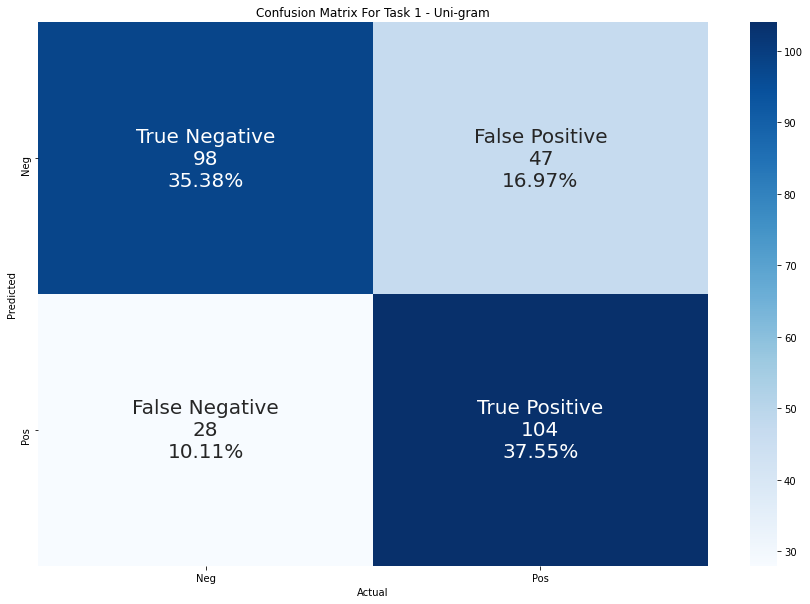

In [29]:
group_names = ["True Negative","False Positive","False Negative","True Positive"]

cf_matrix = confusion_matrix(y_test, y_predict)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/numpy.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(15,10))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories,annot_kws={"size": 20})
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For Task 1 - Uni-gram")
plt.show(ax)

## Reference

Daniel, J. and Martin, J. (n.d.). Speech and Language Processing. [online] Available at: https://web.stanford.edu/~jurafsky/slp3/4.pdf.

# Task 2

- identify an alternative classification algorithm, or
- apply modifications to the Naïve Bayes implementation, for example trying different classification of different size n-grams (multi-word phrases). Implement this improvement and compare the results to your initial Naïve Bayes classifier. 

We use Naive Bayes in each word of the phrase, as in the previous algorithm. When more complicated sentences, such as 'terrible,' emerge in our reviews, we are more likely to interpret this as a negative review. What if this statement contains the word 'not bad'? Uni-gram will miss the word 'not' and treat it as Negative instead of Positive. As a result, I would employ N-gram to solve such issues. You may view examples of Bi-gram and Tri-gram in this example to better grasp what is N-gram.

***Uni-gram Example:***

    Example Sentence: 'This Ford's series is not awful.'
    After Uni-gram: [This],[Ford],[series],[is],[not],[awful]
    
***Bi-gram Example:***

    Example Sentence: 'This Ford's series is not awful.'
    After Bi-gram: [This,Ford],[series,is],[not,awful]

***Tri-gram Example:***

    Example Sentence: 'This Ford's series is not awful.'
    After Bi-gram: [This,Ford,series],[is,not,awful]
    
    
### What is N-gram ?
N-gram is a consecutive order of n words from a given sample speech or text , in this task we imply as sample review. Usually The list would contain letters or words. in this task each list would contain the word.



### Why use N-gram ?
Simpleness and scalability are two significant advantages of n-gram model. Scalling up n allows a model to capture much information for trial to upgrade accuracy.

### What i expect from this implementation?

Anyway, I expected to observe a higher accuracy when comparing this method to the prior algorithm, but this method does not guarantee that analysts will achieve better accuracy when using more n because it is still dependent on the sentence's level of complexity.


### Literature review
According to Aisopos and George Papadakis' study, "Sentiment Analysis of Social Media Content Using N-Gram Graphs." They choose to use Multinomial Naive Bayes in various n-grams. The results show that after preprocessing data and increasing the amount of words in each group, they gain an additional 10%.

According to the study "Sentiment Analysis Of Hotel Review Using N-Gram And Naive Bayes Methods" by Widiyaningtyas, Zaeni, and Farisi [2], users are unable to filter out all of the reviews due to the large amount of reviews available. Sentiment analysis can help solve this problem by categorising reviews into positive or negative attitudes. The goal of this research is to see how n-gram and naive bayes algorithms may be used in sentiment analysis classification. The results demonstrate that when the analyst's n-gram increases, accuracy decreases. Furthermore, uni-gram accuracy is the best.

### Reference
Aisopos, F., Papadakis, G. and Varvarigou, T. (2011). Sentiment analysis of social media content using N-Gram graphs.<br><Br>
Triyanna Widiyaningtyas, Ilham Ari Elbaith Zaeni and Riswanda Al Farisi (2020). Sentiment Analysis Of Hotel Review Using N-Gram And Naive Bayes Methods.

# How the model would be implement

In this section i will not start from scarcth as previuos task. <br><br>
First, I'd convert the data to a dataframe using the pandas library's functions, then assign X to reviews (feature) and Y to sentiment reviews (label). Following that, they are divided into train and test sets in the same manner as Task 1. <br><br>
Second, using __CounterVectorizer__, I would break the word from the training set in N-gram rule, including changing the alphabet to lower case and removing the stop word. <br><br>
Finally,After training, i would apply this model with testing set and evaluate the accuracy.

#### Let focus in  Setting CounterVectorizer

Vectorizer should have CountVectorizer (Object) assigned to it (variable). It would apply the properties of attribute to X if I fit this object within dependant input data (X). The phrase would be transformed to lowercase (attribute lowercase), a stop word would be removed (attribute stop word), and the number of words to be extracted for each member in the sentence list (attribute ngram range) as shown in the code below.<br>

ngram_range(1,1) : uni-gram <br>
ngram_range(2,2) : bi-gram <br>
ngram_range(3,3) : tri-gram <br>
ngram_rnage(1,2) : uni+bi gram <br>

## Bi-gram

Set ngram_range to (2,2) 

The accuray using Bi-gram is 71.12%


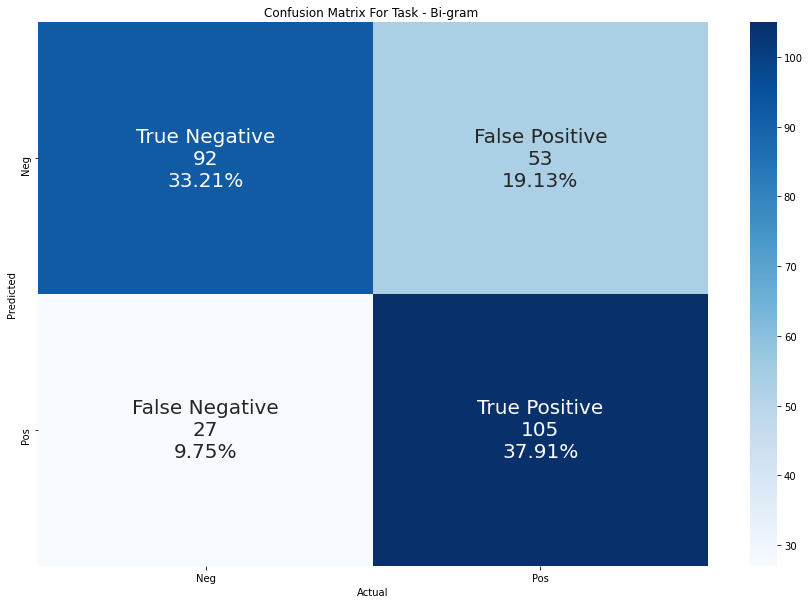

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

car_reviews = pd.read_csv('car_reviews.csv')
X = car_reviews['Review']
y = car_reviews['Sentiment']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2,random_state=20)

vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(2,2))
X_train2 = vectorizer.fit_transform(X_train2)
X_test2 = vectorizer.transform(X_test2)
clf = MultinomialNB()
clf.fit(X_train2, y_train2)
y_predict2=clf.predict(X_test2)
score2=accuracy_score(y_test2, y_predict2)
print("The accuray using Bi-gram is {:.2%}".format(score2))

group_names = ["True Negative","False Positive","False Negative","True Positive"]

cf_matrix = confusion_matrix(y_test2, y_predict2)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/numpy.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(15,10))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories,annot_kws={"size": 20})
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For Task - Bi-gram ")
plt.show(ax)

# Tri-gram

set ngram_range to (3,3)

The accuracy using Tri-gram is 57.76%


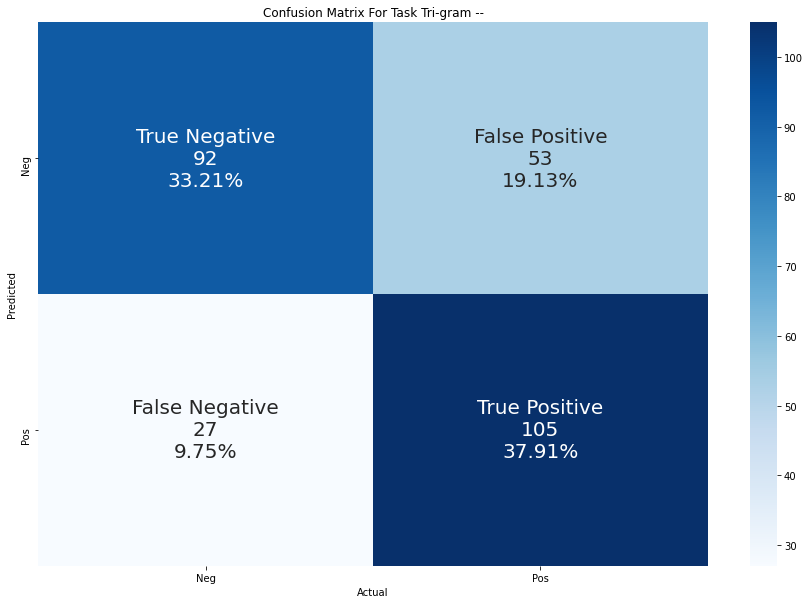

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

car_reviews = pd.read_csv('car_reviews.csv')
X = car_reviews['Review']
y = car_reviews['Sentiment']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2,random_state=20)

vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(3,3))
X_train3 = vectorizer.fit_transform(X_train3)
X_test3 = vectorizer.transform(X_test3)
clf = MultinomialNB()
clf.fit(X_train3, y_train3)
y_predict3=clf.predict(X_test3)
score3=accuracy_score(y_test3, y_predict3)
print("The accuracy using Tri-gram is {:.2%}".format(score3))

group_names = ["True Negative","False Positive","False Negative","True Positive"]

cf_matrix = confusion_matrix(y_test2, y_predict2)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/numpy.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(15,10))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories,annot_kws={"size": 20})
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For Task Tri-gram --")
plt.show(ax)

## Reference

Scikit-learn.org. (2018). sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.20.3 documentation. [online]Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html. <Br><br>
Daniel, J. and Martin, J. (n.d.). Speech and Language Processing. [online] Available at: https://web.stanford.edu/~jurafsky/slp3/3.pdf.<br><br>
Nair, A. (2021). Leveraging N-grams to Extract Context From Text. [online] Medium. Available at: https://towardsdatascience.com/leveraging-n-grams-to-extract-context-from-text-bdc576b47049 [Accessed 8 Jan. 2022]

# Comparison Approaches

### summary
    Task 1 ----Uni-gram got accuracy at 72.92%
    Task 2 ----Bi-gram got accuracy at 71.12%
               Tri-gram got accuracy at 57.76%

The accuracy of the Bi-gram appears to be slightly lower than that of the uni-gram, while the accuracy of the Tri-gram looks to be substantially worse, as seen in the above data. As a result, this review dataset is the best fit for Uni-gram sentiment analysis. The reason for this is that The reviews provided are not unduly difficult to comprehend. Additionally, words with contradictory meanings are rarely combined.
